In [2]:
import filter
import IO
import settings
import numpy as np
import json
import os
import pickle 
from matplotlib import pyplot as plt
import scipy
import mne

In [8]:
with open('settings\\settings.json', 'rb') as f:
        settings = json.load(f)

In [9]:
settings

{'BIDS_path': 'C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\BIDS Berlin',
 'out_path': 'C:\\Users\\ICN_admin\\Documents\\icn\\icn_m1\\restructure\\BIDS_Berlin_M1',
 'resamplingrate': 10,
 'max_dist_cortex': 20,
 'max_dist_subcortex': 5,
 'normalization_time': 10,
 'frequencyranges': [[4, 8],
  [8, 12],
  [13, 20],
  [20, 35],
  [13, 35],
  [60, 80],
  [90, 200],
  [60, 200]],
 'seglengths': [1, 2, 2, 3, 3, 3, 10, 10, 10]}

In [10]:
ieeg_files = IO.get_all_ieeg_files(settings['BIDS_path'])

In [11]:
ieeg_files

['C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\BIDS Berlin\\sub-002\\ses-20200130\\ieeg\\sub-002_ses-20200130_task-restMEDON20200130T111458_run-0_ieeg.vhdr',
 'C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\BIDS Berlin\\sub-002\\ses-20200130\\ieeg\\sub-002_ses-20200130_task-restMEDONAVGREF20200130T112142_run-1_ieeg.vhdr',
 'C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\BIDS Berlin\\sub-002\\ses-20200131\\ieeg\\sub-002_ses-20200131_task-evoked202001310001_run-0_ieeg.vhdr',
 'C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\BIDS Berlin\\sub-002\\ses-20200131\\ieeg\\sub-002_ses-20200131_task-evoked202001310002_run-1_ieeg.vhdr',
 'C:\\Users\\ICN_admin\\Charité - Universitätsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\BIDS Be

In [12]:
subject, run, sess = IO.get_sess_run_subject(ieeg_files[0])

In [13]:
subject

'002'

In [14]:
run

'0'

In [15]:
sess

'20200130'

In [16]:
sf=IO.read_run_sampling_frequency(ieeg_files[0])

In [17]:
sf

0     4098.360656
1     4098.360656
2     4098.360656
3     4098.360656
4     4098.360656
5     4098.360656
6     4098.360656
7     4098.360656
8     4098.360656
9     4098.360656
10    4098.360656
11    4098.360656
12    4098.360656
13    4098.360656
14    4098.360656
15    4098.360656
16    4098.360656
17    4098.360656
18    4098.360656
19    4098.360656
20    4098.360656
21    4098.360656
22    4098.360656
23    4098.360656
24    4098.360656
25    4098.360656
26    4098.360656
Name: sampling_frequency, dtype: float64

In [18]:
line_noise = IO.read_line_noise(settings['BIDS_path'],"002") # the line noise column is missing in the 
# participants.tsv

FileNotFoundError: [Errno 2] File b'C:\\Users\\ICN_admin\\Charit\xc3\xa9 - Universit\xc3\xa4tsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\BIDS Berlinparticipants.tsv' does not exist: b'C:\\Users\\ICN_admin\\Charit\xc3\xa9 - Universit\xc3\xa4tsmedizin Berlin\\Interventional Cognitive Neuromodulation - Data\\BIDS Berlinparticipants.tsv'

In [22]:
sf[0]

4098.360655737705

### adapt the filter function! 

In [23]:
if sf[0]>1000:
    filter_len=sf
else:
    filter_len=1001

In [28]:
settings['frequencyranges']

[[4, 8], [8, 12], [13, 20], [20, 35], [13, 35], [60, 80], [90, 200], [60, 200]]

In [29]:
filter_len[0]

4098.360655737705

In [32]:
np.ceil(filter_len[0])

4099.0

In [35]:
settings['seglengths']

[1, 2, 2, 3, 3, 3, 10, 10, 10]

In [37]:
filter_fun = filter.calc_band_filters(settings['frequencyranges'], sample_rate=sf[0], filter_len=int(np.ceil(filter_len[0])))
    
offset_start = int((sf[0]/settings['seglengths'][0]) / (sf[0]/settings['resamplingrate']))

No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 10.00 Hz)
- Filter length: 4099 samples (1.000 sec)

No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB s

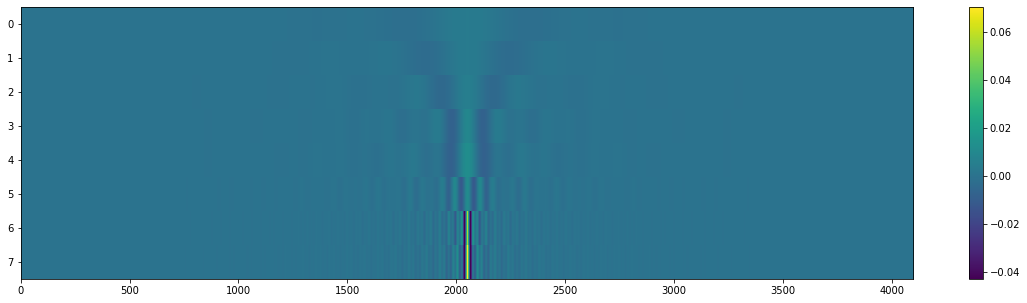

In [47]:
plt.figure(figsize=(20,5))
plt.imshow(filter_fun, aspect='auto')
plt.colorbar()
plt.show()

In [40]:
offset_start

10

In [48]:
ieeg_raw, ch_names = IO.read_BIDS_file(ieeg_files[0])

Extracting parameters from C:\Users\ICN_admin\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\BIDS Berlin\sub-002\ses-20200130\ieeg\sub-002_ses-20200130_task-restMEDON20200130T111458_run-0_ieeg.vhdr...
Setting channel info structure...


In [49]:
ch_names

['CREF',
 'LFP_BS_STN_R_1',
 'LFP_BS_STN_R_2',
 'LFP_BS_STN_R_3',
 'LFP_BS_STN_R_4',
 'LFP_BS_STN_R_5',
 'LFP_BS_STN_R_6',
 'LFP_BS_STN_R_7',
 'LFP_BS_STN_R_8',
 'LFP_BS_STN_L_1',
 'LFP_BS_STN_L_2',
 'LFP_BS_STN_L_3',
 'LFP_BS_STN_L_4',
 'LFP_BS_STN_L_5',
 'LFP_BS_STN_L_6',
 'LFP_BS_STN_L_7',
 'LFP_BS_STN_L_8',
 'EEG_TM_Cz__1',
 'EEG_TM_Cz__2',
 'ECOG_AT_SM_L_1',
 'ECOG_AT_SM_L_2',
 'ECOG_AT_SM_L_3',
 'ECOG_AT_SM_L_4',
 'ECOG_AT_SM_L_5',
 'ECOG_AT_SM_L_6',
 'EMG_TM_BR_R_1',
 'EMG_TM_BR_L_1']

In [51]:
ieeg_raw.shape

(27, 1232738)

### now call / rewrite run file

In [ ]:
sampling with new fs

In [ ]:
fs = 1000
fs_new = 10
fs / 

In [86]:
#given the ieeg raw file write a generator
def ieeg_raw_generator(ieeg_raw, fs, fs_new, offset_start):
     
    cnt_fsnew = 0
    for cnt in range(ieeg_raw.shape[1]):
        if cnt < offset_start:
            cnt_fsnew +=1
            continue
        
        cnt_fsnew +=1
        if cnt_fsnew >= (fs/fs_new):
            cnt_fsnew = 0
            yield ieeg_raw[:,cnt-offset_start:cnt]

In [87]:
gen_ = ieeg_raw_generator(ieeg_raw, fs=4096, fs_new=10, offset_start=4096)

In [88]:
arr = next(gen_)

In [92]:
settings["seglengths"]

[1, 2, 2, 3, 3, 3, 10, 10, 10]

In [94]:
4096/np.array(settings["seglengths"])

array([4096.        , 2048.        , 2048.        , 1365.33333333,
       1365.33333333, 1365.33333333,  409.6       ,  409.6       ,
        409.6       ])

In [97]:
(4096/np.array(settings["seglengths"])).astype(int)

array([4096, 2048, 2048, 1365, 1365, 1365,  409,  409,  409])

In [100]:
filter_fun.shape

(8, 4099)

In [108]:
arr.shape[0]-1

26

In [111]:
dat_notch_filtered = mne.filter.notch_filter(x=arr.T, Fs=4096, trans_bandwidth=7,
            freqs=np.arange(50, 4*50, 50),
            fir_design='firwin', verbose=False, notch_widths=1,filter_length=arr.T.shape[0]-1)

<ipython-input-111-af4568edbcd1>:3: RuntimeWarning: filter_length (4095) is longer than the signal (27), distortion is likely. Reduce filter length or filter a longer signal.
  fir_design='firwin', verbose=False, notch_widths=1,filter_length=arr.T.shape[0]-1)


In [110]:
from mne import viz

In [113]:
info = mne.create_info(ch_names, 4096, ch_types='ecog')
raw = mne.io.RawArray(arr, info)

Creating RawArray with float64 data, n_channels=27, n_times=4096
    Range : 0 ... 4095 =      0.000 ...     1.000 secs
Ready.


In [125]:
ch_names

['CREF',
 'LFP_BS_STN_R_1',
 'LFP_BS_STN_R_2',
 'LFP_BS_STN_R_3',
 'LFP_BS_STN_R_4',
 'LFP_BS_STN_R_5',
 'LFP_BS_STN_R_6',
 'LFP_BS_STN_R_7',
 'LFP_BS_STN_R_8',
 'LFP_BS_STN_L_1',
 'LFP_BS_STN_L_2',
 'LFP_BS_STN_L_3',
 'LFP_BS_STN_L_4',
 'LFP_BS_STN_L_5',
 'LFP_BS_STN_L_6',
 'LFP_BS_STN_L_7',
 'LFP_BS_STN_L_8',
 'EEG_TM_Cz__1',
 'EEG_TM_Cz__2',
 'ECOG_AT_SM_L_1',
 'ECOG_AT_SM_L_2',
 'ECOG_AT_SM_L_3',
 'ECOG_AT_SM_L_4',
 'ECOG_AT_SM_L_5',
 'ECOG_AT_SM_L_6',
 'EMG_TM_BR_R_1',
 'EMG_TM_BR_L_1']

Effective window size : 0.500 (s)


<ipython-input-128-a638265c3c62>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=["ECOG_AT_SM_L_1", "ECOG_AT_SM_L_2", "ECOG_AT_SM_L_3"])


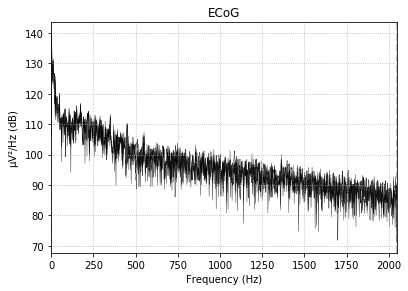

In [128]:
raw.plot_psd(picks=["ECOG_AT_SM_L_1", "ECOG_AT_SM_L_2", "ECOG_AT_SM_L_3"])
plt.show()

In [98]:
dat_filt = filter.apply_filter(arr, sample_rate=4096, filter_fun=a, \
                               line_noise=50, seglengths=(4096/np.array(settings["seglengths"])).astype(int))

ValueError: The requested filter length 27 is too short for the requested 1.75 Hz transition band, which requires 3863 samples